In [1]:
no_lava = r'/data2/zhangzheng1/data/coreutils-8.32/errInfo'
lava = r'/data2/zhangzheng1/data/lava_corpus/LAVA-M/md5sum/coreutils-8.24-lava-safe/errInfo'

In [2]:
from collections import Counter
import re

def dealInfo(path):
    c = Counter()
    with open(path, 'r') as fp:
        lines = fp.readlines()
    print(len(lines))
    for line in lines:
        if '[PC]' in line: c['PC'] += 1
        elif '[CMP]' in line: c['CMP'] += 1
        elif '[SWITCH]' in line: c['SWITCH'] += 1
        elif '[STRCMP]' in line: c['STRCMP'] += 1
        else:
            print('[!] {}'.format(line))
    return c

In [3]:
c1 = dealInfo(no_lava)

216537
[!] ./src/md5sum: /bin/chacl: No such file or directory

[!] ./src/md5sum: /bin/getfacl: No such file or directory

[!] ./src/md5sum: /bin/nc.traditional: No such file or directory

[!] ./src/md5sum: /bin/ntfsck: No such file or directory

[!] ./src/md5sum: /bin/ntfsdump_logfile: No such file or directory

[!] ./src/md5sum: /bin/ntfsmftalloc: No such file or directory

[!] ./src/md5sum: /bin/ping: No such file or directory

[!] ./src/md5sum: /bin/ping6: No such file or directory

[!] ./src/md5sum: /bin/setfacl: No such file or directory

[!] ./src/md5sum: WARNING: 9 listed files could not be read

[!] ./src/md5sum: WARNING: 121 computed checksums did NOT match



In [4]:
c2 = dealInfo(lava)

471


In [5]:
print(c1)
print(c2)

Counter({'PC': 190869, 'SWITCH': 13447, 'CMP': 12070, 'STRCMP': 140})
Counter({'PC': 239, 'CMP': 214, 'SWITCH': 11, 'STRCMP': 7})


In [6]:
keys = sorted(c1.keys())

In [7]:
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.get_configdir())

/home/zhangzheng1/.config/matplotlib


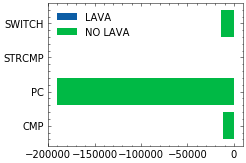

In [12]:
with plt.style.context(['science', 'no-latex']):
    plt.barh(keys, [c2[k] for k in keys], label='LAVA')
    plt.barh(keys, [-c1[k] for k in keys], label='NO LAVA')
    plt.legend()
    plt.show()